In [23]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
#df = pd.read_csv('../../data/')

In [25]:
# Find all columns that contain "Distance" in their name
distance_columns = [col for col in df.columns if 'Distance' in col]

# Replace -1 with None (NaN) in these columns
df[distance_columns] = df[distance_columns].replace(-1, np.nan)

# Drop rows that contain missing values (NaN)
df = df.dropna()


In [26]:
# Separate features and target variable
X = df.drop(['Cost', 'Address', 'Closest Gov Secondary School', 'Postcode', 'SA2  code'], axis=1)  # Features
y = df['Cost']  # Target variable

Test RMSE (Random Forest): 141.7028302331022
Test MAE (Random Forest): 81.68010204682304
Test MSE (Random Forest): 20079.692096071383
Test R^2 (Random Forest): 0.428466370391696
Bathrooms                      0.173390
CBD Distance                   0.119612
income_2020                    0.103440
Bedrooms                       0.101956
longitude                      0.072836
latitude                       0.046065
Tourist Attraction Distance    0.043012
Park Distance                  0.037262
Electricity Distance           0.033558
Grocery Distance               0.031671
Train Distance                 0.031595
Hospital Distance              0.031315
Library Distance               0.030496
Age 40-59                      0.024667
Gov Secondary Distance         0.022858
Age 20-39                      0.022163
Age under 20                   0.021549
Age 60+                        0.017849
Incidents Recorded             0.013047
2026                           0.011110
2023                  

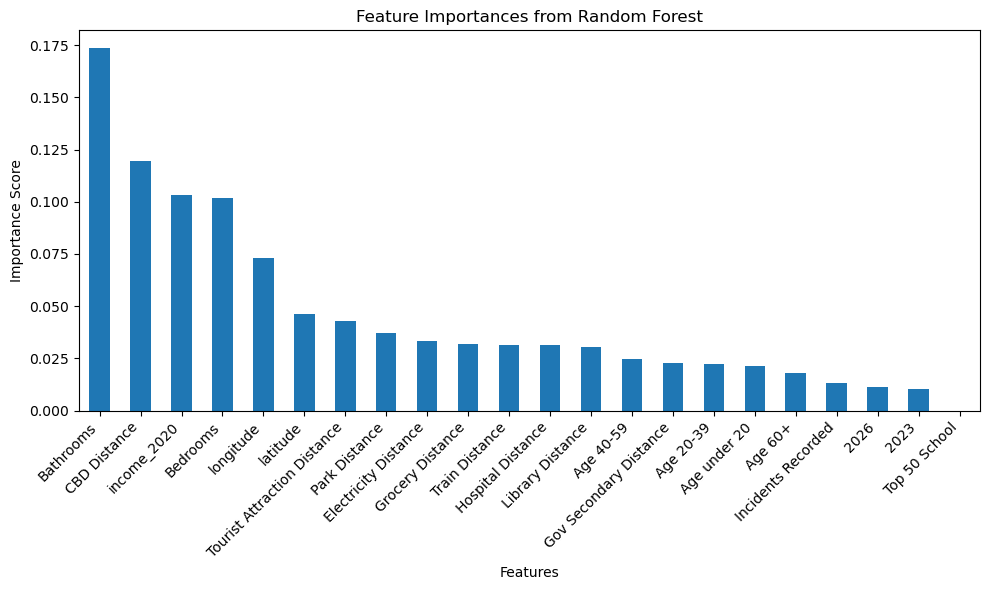

In [30]:
# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Output the test results
print("Test RMSE (Random Forest):", test_rmse)
print("Test MAE (Random Forest):", test_mae)
print("Test MSE (Random Forest):", test_mse)
print("Test R^2 (Random Forest):", test_r2)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort feature importances
important_features = feature_importances.sort_values(ascending=False)

# Select important features
top_features = important_features[:]
print(top_features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Test RMSE (Random Forest): 141.57561504873297
Test MAE (Random Forest): 81.66361121471216
Test MSE (Random Forest): 20043.65477642703
Test R^2 (Random Forest): 0.42949211022869893
Bathrooms                      0.173295
CBD Distance                   0.119162
income_2020                    0.103647
Bedrooms                       0.101938
longitude                      0.073061
latitude                       0.046723
Tourist Attraction Distance    0.043274
Park Distance                  0.036821
Electricity Distance           0.033089
Train Distance                 0.032126
Grocery Distance               0.031804
Hospital Distance              0.031320
Library Distance               0.030063
Age 40-59                      0.024776
Gov Secondary Distance         0.022480
Age under 20                   0.021897
Age 20-39                      0.021569
Age 60+                        0.017653
Incidents Recorded             0.013315
2023                           0.011092
2026                

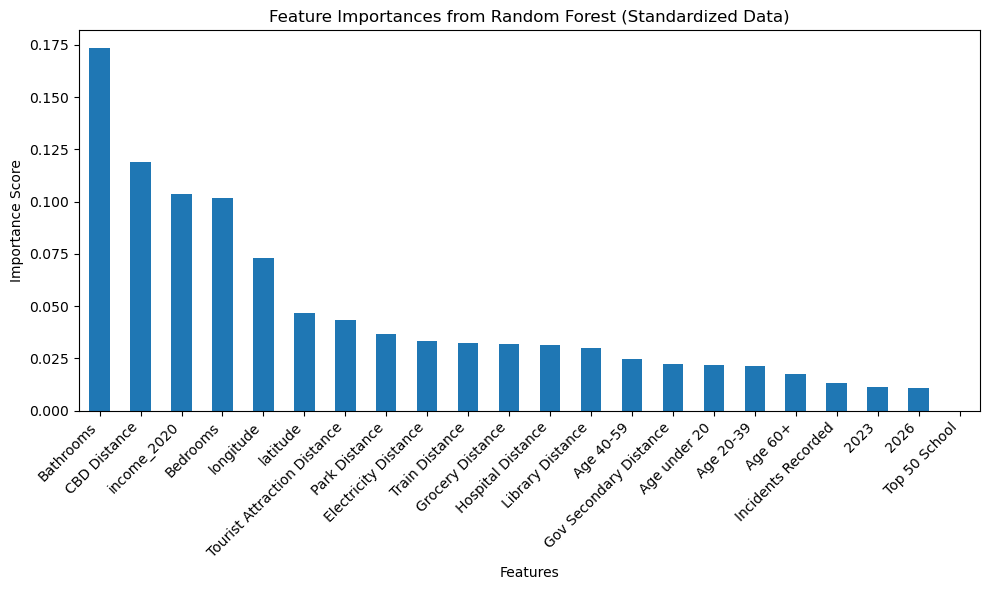

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the standard scaler
scaler = StandardScaler()

# Standardize the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using RandomForest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Calculate the metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

# Output the test results
print("Test RMSE (Random Forest):", test_rmse)
print("Test MAE (Random Forest):", test_mae)
print("Test MSE (Random Forest):", test_mse)
print("Test R^2 (Random Forest):", test_r2)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort feature importances
important_features = feature_importances.sort_values(ascending=False)

# Select important features
top_features = important_features[:]
print(top_features)

# Visualize feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("Feature Importances from Random Forest (Standardized Data)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Fit random forest, this should need less preprocess than linear, just make sure no missing value slip through in processing step. \
Plot out feature importance plot, this is needed.
Make sure relatively OK preformance (RMSE not > 20% range if you need standard :D)